<a href="https://colab.research.google.com/github/chantefucmo/gpt-ai-assistant/blob/main/%E5%A4%A7%E9%99%B8_%E5%8F%B0%E7%81%A3_%E7%94%A8%E8%AA%9E%E8%B3%87%E6%96%99%E5%BA%AB%E7%88%AC%E8%9F%B2%E5%AF%A6%E4%BD%9C_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#大陸/台灣 用語資料庫爬蟲實作

##開源中文字型下載

--2024-10-31 07:15:28--  https://drive.google.com/uc?export=download&id=1Om8izPz02Msc15onhS_ki1lrlAIf05Pd
Resolving drive.google.com (drive.google.com)... 142.250.98.113, 142.250.98.102, 142.250.98.100, ...
Connecting to drive.google.com (drive.google.com)|142.250.98.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1Om8izPz02Msc15onhS_ki1lrlAIf05Pd&export=download [following]
--2024-10-31 07:15:29--  https://drive.usercontent.google.com/download?id=1Om8izPz02Msc15onhS_ki1lrlAIf05Pd&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 108.177.12.132, 2607:f8b0:400c:c08::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|108.177.12.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21737516 (21M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Bold.ttf’

TaipeiSansTCBeta-Bo 100%[===================>]  20.73

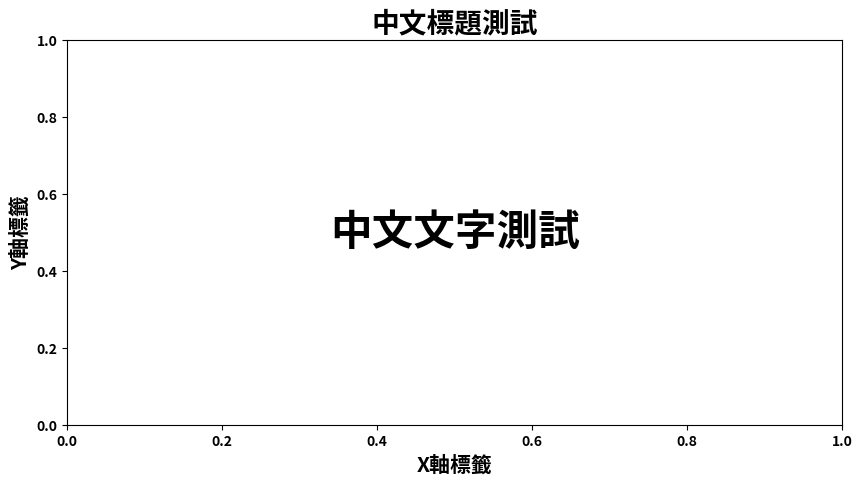

如果上面的圖片顯示正確的中文，則字體設置成功！


In [ ]:
# 下載台北思源黑體
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1Om8izPz02Msc15onhS_ki1lrlAIf05Pd' -O TaipeiSansTCBeta-Bold.ttf

# 導入必要的庫
from matplotlib.font_manager import FontProperties, fontManager
import matplotlib.pyplot as plt
import matplotlib

# 指定字體檔案的路徑
font_path = 'TaipeiSansTCBeta-Bold.ttf'

# 將下載的字體加入到 Matplotlib 的字體管理器中
font = FontProperties(fname=font_path)
fontManager.addfont(font_path)

# 重置 Matplotlib 的字體快取
!rm -rf /root/.cache/matplotlib/*

# 設置 Matplotlib 使用下載的字體
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta'] + plt.rcParams['font.sans-serif']

# 測試中文顯示
plt.figure(figsize=(10,5))
plt.title('中文標題測試', fontsize=20)
plt.xlabel('X軸標籤', fontsize=15)
plt.ylabel('Y軸標籤', fontsize=15)
plt.text(0.5, 0.5, '中文文字測試', fontsize=30, ha='center', va='center')
plt.show()

print("如果上面的圖片顯示正確的中文，則字體設置成功！")

##教育部國語辭典_兩岸常用詞語對照表
https://dict.concised.moe.edu.tw/appendix.jsp?ID=54&page=1

一直到

https://dict.concised.moe.edu.tw/appendix.jsp?ID=54&page=7

安裝套件

requests：負責發送請求和抓取網頁內容。

pandas：負責存放、處理數據並匯出至 Excel 檔。

openpyxl：作為 pandas.to_excel 的引擎，用來生成 Excel 格式的檔案。

1.requests

作用：

requests 是一個 Python 用於發送 HTTP 請求的套件，簡單易用且功能強大。它可以幫助我們從網頁中提取資料，是進行網頁爬蟲的常用工具之一。

在本程式中的使用：

發送 GET 請求來訪問指定的 URL 並下載頁面內容。
設定頁面編碼為 utf-8，以便正確處理中文。
透過 response 物件來檢查請求是否成功，例如 response.status_code 會返回狀態碼，確保只有成功回應的頁面才進行後續解析。

2.pandas

作用：pandas 是一個強大的數據處理和分析套件，提供了便捷的數據結構如 DataFrame，使得數據的清理、篩選、分析和匯出都非常方便。

在本程式中的使用：

將爬取的資料（台灣用語、大陸用語）存入 DataFrame，這是一種類似於表格的數據結構，可以輕鬆進行列與欄的操作。
利用 to_excel 方法，將處理好的資料匯出為 Excel 檔案，使得資料易於保存和分享。

特點：

pandas 提供的數據結構和操作功能讓我們可以輕鬆進行資料的增刪改查，非常適合處理結構化的資料。

3.openpyxl

作用：

openpyxl 是一個專門用於讀取和寫入 Excel 檔案（.xlsx 格式）的 Python 套件。它通常與 pandas 一同使用來處理 Excel 檔案的輸出。

在本程式中的使用：

作為 pandas.to_excel 函數的引擎，確保資料能以 .xlsx 格式存成 Excel 檔案。

在 pandas 匯出 Excel 時指定 engine='openpyxl'，讓 pandas 使用 openpyxl 來處理 Excel 檔案的寫入。

特點：

openpyxl 支援多種 Excel 格式，並且允許更進階的 Excel 操作（例如樣式設定、單元格合併等），不過在這個程式中只需要用到基本的匯出功能。

In [ ]:
# 安裝必要的套件
!pip install requests pandas openpyxl

# 匯入所需的模組
import requests
from bs4 import BeautifulSoup
import pandas as pd

# 定義爬取的 URL 範圍
base_url = "https://dict.concised.moe.edu.tw/appendix.jsp?ID=54&page="
page_range = range(1, 8)  # 指定要爬取的頁數範圍，從1到7

# 建立存放資料的空列表
data = []

# 開始進行每一頁的爬取
for page in page_range:
    url = base_url + str(page)  # 組合完整的頁面 URL
    response = requests.get(url)  # 發送 GET 請求獲取頁面資料
    response.encoding = 'utf-8'  # 設置編碼為 UTF-8 以正確讀取中文

    # 檢查請求是否成功
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')  # 使用 BeautifulSoup 解析 HTML

        # 尋找表格中的所有行（假設詞彙資料在 table > tr 標籤中）
        rows = soup.find_all('tr')

        for row in rows[1:]:  # 跳過表頭
            cols = row.find_all('td')  # 獲取該行中的所有欄位資料

            # 確保欄位數符合要求（跳過注音符號，只提取台灣用語和大陸用語）
            if len(cols) >= 3:
                taiwan_term = cols[1].text.strip()  # 取得台灣用語
                mainland_term = cols[2].text.strip()  # 取得大陸用語

                # 將爬取的資料加入到列表中
                data.append({
                    '台灣用語': taiwan_term,
                    '大陸用語': mainland_term
                })
    else:
        print(f"無法獲取頁面 {url} 的資料，狀態碼：{response.status_code}")

# 將資料轉換為 pandas DataFrame
df = pd.DataFrame(data)

# 匯出資料為 Excel 檔案
excel_file_path = "/content/兩岸用語對照表_最終版.xlsx"  # 指定 Excel 檔案儲存路徑
df.to_excel(excel_file_path, index=False, engine='openpyxl')  # 將 DataFrame 匯出為 Excel

# 顯示檔案下載連結
from google.colab import files
files.download(excel_file_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##中華語言知識庫
https://www.chinese-linguipedia.org/search_difference_results.html?category=1

一直到

https://www.chinese-linguipedia.org/search_difference_results.html?category=5